In [15]:
import csv
import os
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import cssutils
from PIL import Image
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
from wand.api import library
import wand.color
import wand.image

data_dir = './source'
# scrape_url_base = 'https://hanziyuan.net/#'
scrape_url_base = 'https://www.zdic.net/hans/'
new_image_filetype = 'png'

char_from = 1
char_to = 177




# char_array_all = np.genfromtxt(os.path.join(data_dir, 'hsk.txt'))

Imported 177 characters from index 1 to 177
[(  1, '起') (  2, '果') (  3, '热') (  4, '院') (  5, '四') (  6, '回')
 (  7, '西') (  8, '国') (  9, '高') ( 10, '怎') ( 11, '系') ( 12, '北')
 ( 13, '一') ( 14, '七') ( 15, '上') ( 16, '下') ( 17, '不') ( 18, '东')
 ( 19, '子') ( 20, '医') ( 21, '字') ( 22, '个') ( 23, '十') ( 24, '中')
 ( 25, '午') ( 26, '气') ( 27, '学') ( 28, '么') ( 29, '开') ( 30, '水')
 ( 31, '九') ( 32, '习') ( 33, '书') ( 34, '汉') ( 35, '雨') ( 36, '买')
 ( 37, '见') ( 38, '视') ( 39, '零') ( 40, '觉') ( 41, '了') ( 42, '二')
 ( 43, '在') ( 44, '五') ( 45, '些') ( 46, '生') ( 47, '坐') ( 48, '电')
 ( 49, '块') ( 50, '影') ( 51, '很') ( 52, '校') ( 53, '客') ( 54, '样')
 ( 55, '家') ( 56, '桌') ( 57, '去') ( 58, '京') ( 59, '亮') ( 60, '想')
 ( 61, '友') ( 62, '人') ( 63, '没') ( 64, '什') ( 65, '对') ( 66, '今')
 ( 67, '叫') ( 68, '他') ( 69, '们') ( 70, '面') ( 71, '候') ( 72, '苹')
 ( 73, '做') ( 74, '小') ( 75, '少') ( 76, '吃') ( 77, '同') ( 78, '名')
 ( 79, '后') ( 80, '吗') ( 81, '听') ( 82, '会') ( 83, '爱') ( 84, '爸')
 ( 85, '租') ( 86, 

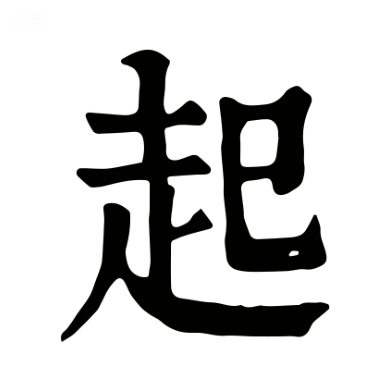

In [17]:
# with open(os.path.join(data_dir, 'hsk.csv'), mode='r', encoding='utf8') as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')

#     csv_file.close()
#     print(prev_char_count)

data = np.genfromtxt(os.path.join(data_dir, 'hsk.csv'), delimiter=',', encoding='utf8', dtype=None)
char_array = data[char_from-1:char_to]
print(f"Imported {char_array.shape[0]} characters from index {char_from} to {char_to}")
print(char_array)

# Get the image url from the site for given character
def scrape_image(url, char):
    print(f"Searching for character {char}")
    scrape_url = scrape_url_base + char
    print(f"Searching on URL {scrape_url}")
    page = requests.get(scrape_url)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find("img", {"class": "lazy kxtimg"})
    
    return results.attrs['data-original']

for char in range(1):#char_array.shape[0]):
    curr_index = char_array[char][0]
    curr_char = char_array[char][1]
    
    curr_char_dir = os.path.join(data_dir, str(curr_index))
    files = os.listdir(curr_char_dir)
    files = [f for f in files if os.path.isfile(curr_char_dir+'/'+f)]
    print(files)
    
    img_path = scrape_image(scrape_url_base, curr_char) 
    seal_image_url = 'https:' + img_path # Url of image
    data = requests.get(seal_image_url).content
    
    new_image_filename = str(curr_index) + '_' + str(int(files[-1][files[-1].index('_')+1:files[-1].index('.')])+1)
    print(new_image_filename)

    svg_filename, headers = urllib.request.urlretrieve(seal_image_url, os.path.join(curr_char_dir, f"{new_image_filename}.svg"))#img_path[img_path.rfind('/')+1:]))
    print(svg_filename)
    

    with open(svg_filename, "r") as f:
        svg_blob = f.read().encode('utf-8')
        with wand.image.Image( blob=svg_blob, format="svg" ) as image:
            png_image = image.make_blob("png")
            fp = io.BytesIO(png_image)
            with fp:
                img = mpimg.imread(fp, format='png')
                plt.imshow(img)
                plt.axis('off')
                plt.show()
            fp.close()
        f.close()
        
#     img.save(os.path.join(curr_char_dir, f"{new_image_filename}.{new_image_filetype}"))
    
#     img_array = np.asarray(s)
#     print(img_array)
    
#     plt.imshow(s)
#     plt.axis('off')
    
#     plt.show()
    
#     f = open(f'{os.path.join(curr_char_dir, new_image_filename)}.{new_image_filetype}','wb')
#     f.write(data)
#     f.close()
    
#     img = Image.open(f'{os.path.join(curr_char_dir, new_image_filename)}.{new_image_filetype}') 
#     img.show()
#     for result in results:
#         print(result.name)